# Matriz de confusão

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

## para questão 60 

import csv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
https://mineracaodedados.wordpress.com/tag/matriz-de-confusao/

## What is Confusion Matrix and why you need it?
Well, it is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

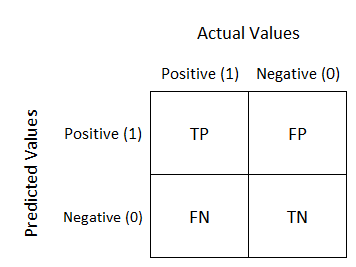

It is extremely useful for measuring Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve.
Let’s understand TP, FP, FN, TN in terms of pregnancy analogy.

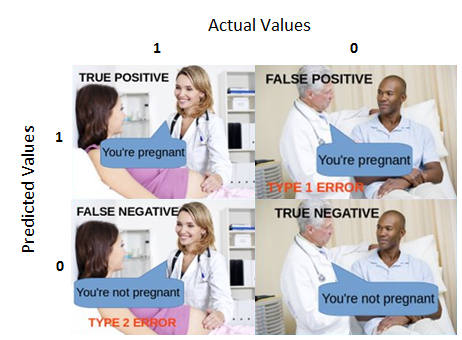

**True Positive:**
Interpretation: You predicted positive and it’s true.
You predicted that a woman is pregnant and she actually is.
**True Negative:**
Interpretation: You predicted negative and it’s true.
You predicted that a man is not pregnant and he actually is not.
**False Positive: (Type 1 Error)**
Interpretation: You predicted positive and it’s false.
You predicted that a man is pregnant but he actually is not.
**False Negative: (Type 2 Error)**
Interpretation: You predicted negative and it’s false.
You predicted that a woman is not pregnant but she actually is.
Just Remember, We describe predicted values as Positive and Negative and actual values as True and False.
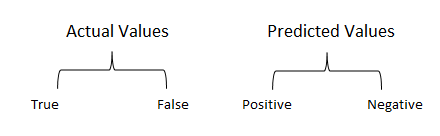

## How to Calculate Confusion Matrix for a 2-class classification problem?
Let’s understand confusion matrix through math.
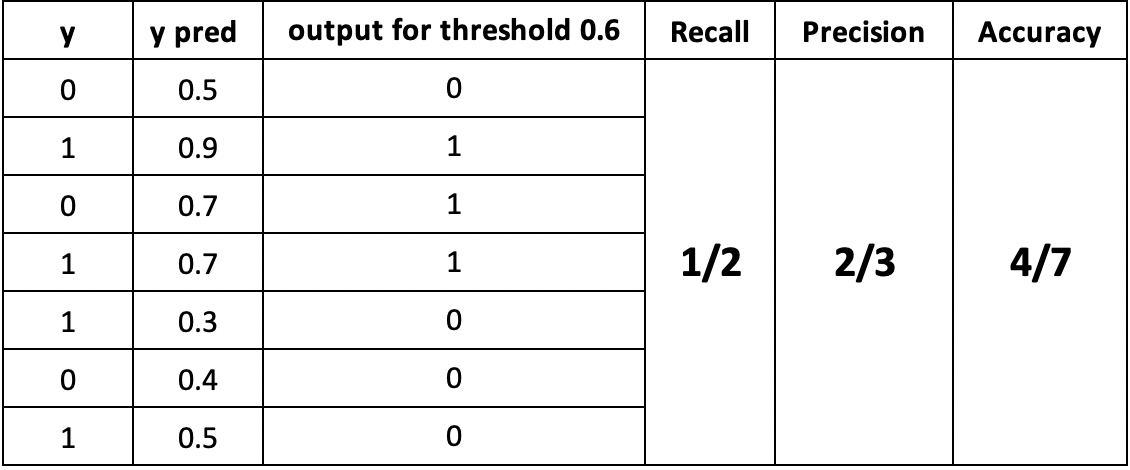
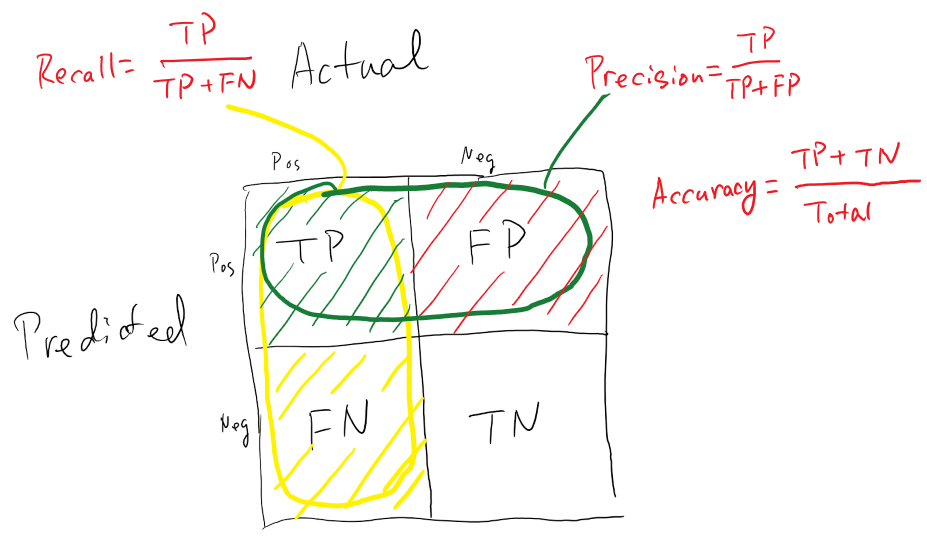

### Recall

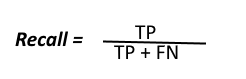

Out of all the positive classes, how much we predicted correctly. It should be high as possible.
### Precision
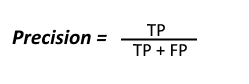

Out of all the positive classes we have predicted correctly, how many are actually positive.
and Accuracy will be
Out of all the classes, how much we predicted correctly, which will be, in this case 4/7. It should be high as possible.
### F-measure
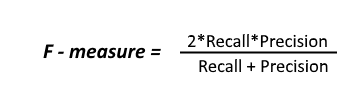
It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

## Questão 59
Faça a matriz de confusão para as questões de 53 a 58.

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.get_cmap('Greens')):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


true_and_predict_53.csv
Confusion matrix, without normalization
[[37  2  0]
 [ 0 24  3]
 [ 5  7 17]]


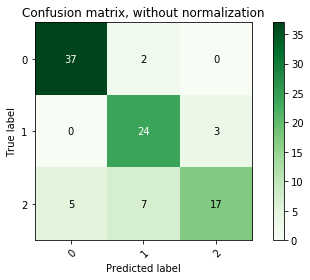

true_and_predict_54.csv
Confusion matrix, without normalization
[[12  0  1]
 [ 0  7 12]
 [ 2  7  7]]


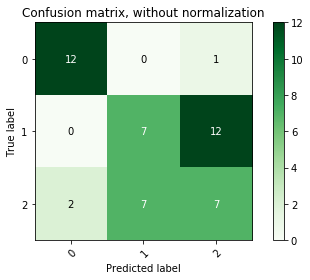

true_and_predict_55.csv
Confusion matrix, without normalization
[[10  1  0]
 [ 0 18  2]
 [ 2  1 14]]


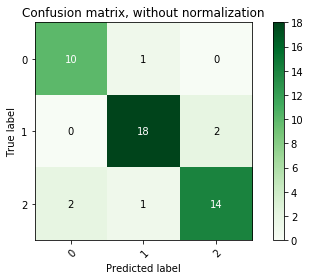

true_and_predict_56.csv
Confusion matrix, without normalization
[[15  0  0]
 [ 0 19  1]
 [ 0  2 11]]


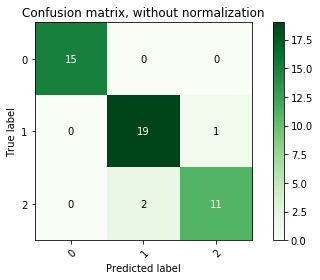

true_and_predict_57.csv
Confusion matrix, without normalization
[[18  2  1]
 [ 0 14  0]
 [ 2 11  0]]


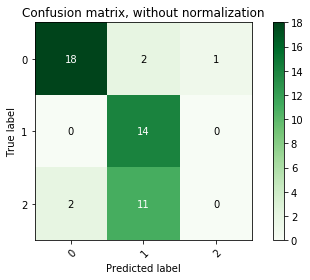

true_and_predict_58.csv
Confusion matrix, without normalization
[[10  0  1]
 [ 0 19  1]
 [ 1  9  7]]


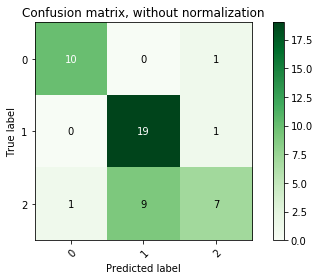

In [3]:
# Get the names of the files in a list
files = ['true_and_predict_' + str(num) + '.csv' for num in range(53, 59)]

# Loop through files
for file in files:
    print(file)
    with open(file, 'r') as infile:
        # Read the csv file
        read = csv.reader(infile, delimiter=',')

        # Get the data from the read files
        data = []
        for row in read:
            data.append(row)

        # Define the class names
        class_names = ['0', '1', '2']

        # Create a list for true and predict labels
        true = [int(x) for x in data[0]]
        pred = [int(x) for x in data[1]]

        # Plot the confusion matrix
        plot_confusion_matrix(true, pred, classes=class_names,
                              title='Confusion matrix, without normalization')
        plt.show()

## Questão 60
Calcule a acurácia, a especificidade e a sensibilidade a partir de cada matriz de confusão obtida na questão 59.

## As métricas

### ACURÁCIA

A proporção de predições corretas, sem levar em consideração o que é positivo e o que é negativo. Esta medida é altamente suscetivel a desbalanceamentos do conjunto de dados e pode facilmente induzir a uma conclusão errada sobre o desempenho do sistema.

>ACURACIA = TOTAL DE ACERTOS / TOTAL DE DADOS NO CONJUNTO
ACURACIA = (VP + VN) / (P + N)

### SENSIBILIDADE

A proporção de verdadeiros positivos: a capacidade do sistema em predizer corretamente a condição para casos que realmente a têm.

>SENSIBILIDADE = ACERTOS POSITIVOS / TOTAL DE POSITIVOS
SENSIBILIDADE = VP / (VP + FN)

### ESPECIFICIDADE

A proporção de verdadeiros negativos: a capacidade do sistema em predizer corretamente a ausência da condição para casos que realmente não a têm.

>ESPECIFICIDADE = ACERTOS NEGATIVOS / TOTAL DE NEGATIVOS
ESPECIFICIDADE = VN / (VN + FP)

### EFICIÊNCIA

A média aritmética da Sensibilidade e Especificidade. Na prática, a sensibilidade e a especificidade variam em direções opostas. Isto é, geralmente, quando um método é muito sensível a positivos, tende a gerar muitos falso-positivos, e vice-versa. Assim, um método de decisão perfeito (100 % de sensibilidade e 100% especificidade) raramente é alcançado, e um balanço entre ambos deve ser atingido.

> EFICIENCIA = (SENS + ESPEC) / 2

### VALOR PREDITIVO POSITIVO

A proporção de verdadeiros positivos em relação a todas as predições positivas. Esta medida é altamente suscetivel a desbalanceamentos do conjunto de dados e pode facilmente induzir a uma conclusão errada sobre o desempenho do sistema.

>VPP = ACERTOS POSITIVOS / TOTAL DE PREDIÇÕES POSITIVAS
VALOR PREDITIVO POSITIVO = VP / (VP + FP)

### VALOR PREDITIVO NEGATIVO

A proporção de verdadeiros negativos em relação a todas as predições negativas. Esta medida é altamente suscetivel a desbalanceamentos do conjunto de dados e pode facilmente induzir a uma conclusão errada sobre o desempenho do sistema.

>VPN = ACERTOS NEGATIVOS / TOTAL DE PREDIÇÕES NEGATIVAS
VALOR PREDITIVO NEGATIVO = VN / (VN + FN)


### COEFICIENTE DE CORRELAÇÃO DE MATTHEWS – COEFICIENTE (PHI)

O coeficiente de correlação de Matthews é uma medida de qualidade de duas classificações binárias que pode ser usada mesmo se as classes possuem tamanhos bastante diferentes. Retorna um valor entre (-1) e (+1), em que um coeficiente de (+1) representa uma predicao perfeita, (0) representa uma predicao aleatoria media, e (-1) uma predicao inversa. Esta estatistica é equivalente ao coeficiente phi, e tenta, assim como a eficiência, resumir a qualidade da tabela de contingência em um único valor numérico passivel de ser comparado.

>phi = (VP*VN – FP*FN) / sqrt((VP + FP)*(VP + FN)*(VN + FP)*(VN + FN))

Note que, se qualquer uma das somas no denominador for igual a (0), o denominador pode ser considerado (1), resutando em um phi igual a (0) que seria o limite correto para esta situação.

*Para Ler:*

KOHAVI, Ron; PROVOST, Foster. Glossary of terms. Machine Learning, v. 30, n. 2-3, p. 271-274, 1998.

In [8]:
# Get the names of the files in a list
files = ['true_and_predict_' + str(num) + '.csv' for num in range(53, 59)]

# Loop through files
for file in files:
    print(file, '\n\n')
    with open(file, 'r') as infile:
        # Read the csv file
        read = csv.reader(infile, delimiter=',')

        # Get the data from the read files
        data = []
        for row in read:
            data.append(row)

        # Create a list for true and predict labels
        true = [int(x) for x in data[0]]
        pred = [int(x) for x in data[1]]

        # Get the confusion matrix
        cm = confusion_matrix(true, pred)

        # Calculate the accuracy
        print('Accuracy: {}'.format(accuracy_score(true, pred)))

        # Show the classification report (precision, recall, f1-score,)
        print('Classification report: \n', classification_report(true, pred))

        print('\n\n###############################################')


true_and_predict_53.csv 


Accuracy: 0.8210526315789474
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.73      0.89      0.80        27
           2       0.85      0.59      0.69        29

    accuracy                           0.82        95
   macro avg       0.82      0.81      0.80        95
weighted avg       0.83      0.82      0.81        95



###############################################
true_and_predict_54.csv 


Accuracy: 0.020833333333333332
Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        16
           2       0.20      0.05      0.08        19

    accuracy                           0.02        48
   macro avg       0.07      0.02      0.03        48
weighted avg       0.08      0.02      0.03        48



######################